This notebook runs various solvers for a single step and dumps out some variables -- it is intended for unit testing.

At the moment, it is required to be at the top-level `pyro/` directory, because not all the functions find pyro's home directory on their own.

In [1]:
from pyro import Pyro

## advection

In [2]:
solver = "advection"
problem_name = "smooth"
param_file = "inputs.smooth"
other_commands = ["driver.max_steps=1", "mesh.nx=8",  "mesh.ny=8"]

pyro ...
initializing the smooth advection problem...


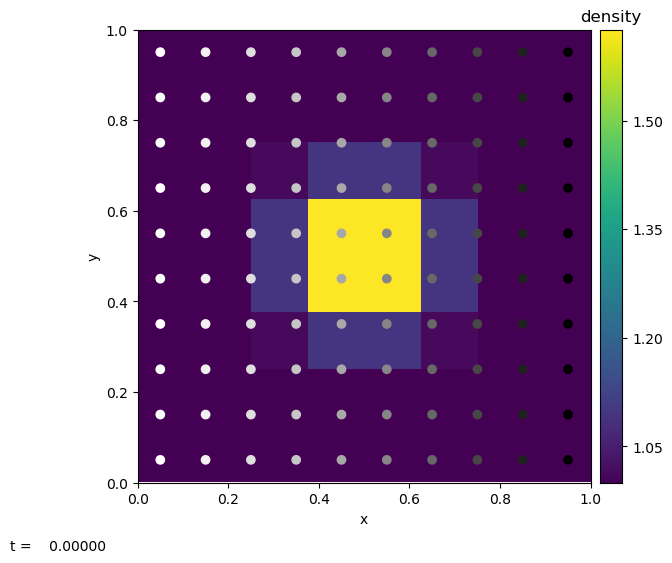

    1    0.10000    0.10000


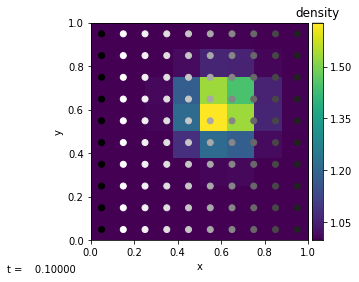

outputting...
main:  0.3755648136138916
   vis:  0.11605525016784668


<Figure size 432x288 with 0 Axes>

In [3]:
pyro_sim = Pyro(solver)
pyro_sim.initialize_problem(problem_name, param_file, other_commands=other_commands)
pyro_sim.run_sim()

In [4]:
dens = pyro_sim.sim.cc_data.get_var("density")
dens.pretty_print(show_ghost=False)

         1         1         1    1.0004    1.0014    1.0013    1.0002         1 
         1         1    1.0003    1.0162    1.0626    1.0579    1.0077    1.0002 
         1    1.0002    1.0116     1.185    1.5348    1.4466    1.0579    1.0013 
         1    1.0001    1.0064    1.2169    1.6258    1.5348    1.0626    1.0014 
         1   0.99994    0.9985     1.085    1.2169     1.185    1.0162    1.0004 
         1   0.99995   0.99797    0.9985    1.0064    1.0116    1.0003         1 
         1         1   0.99995   0.99994    1.0001    1.0002         1         1 
         1         1         1         1         1         1         1         1 

         ^ y
         |
         +---> x
        


## advection_nonuniform

In [5]:
solver = "advection_nonuniform"
problem_name = "slotted"
param_file = "inputs.slotted"
other_commands = ["driver.max_steps=1", "mesh.nx=8",  "mesh.ny=8"]

pyro ...
initializing the slotted advection problem...
extrema:  0.46875 -0.46875


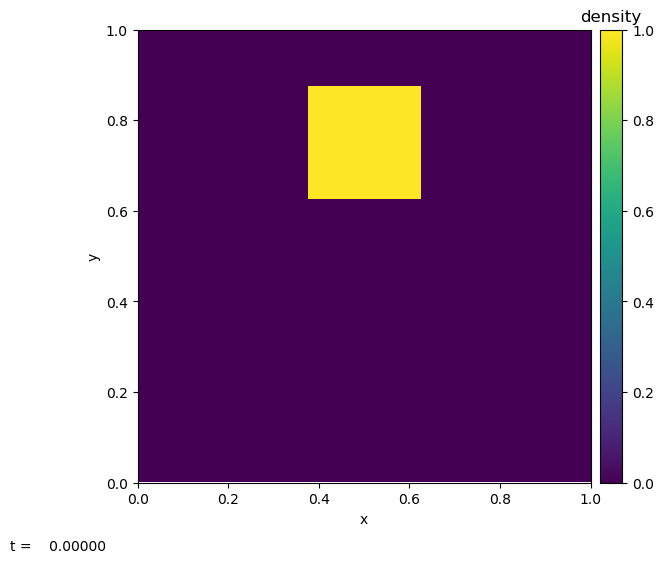

    1    0.45714    0.45714
outputting...


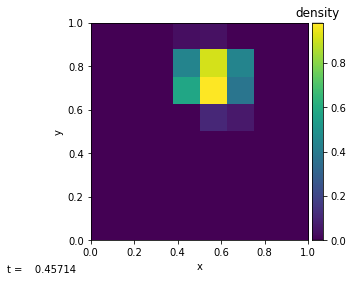

outputting...
parameter particles.n_particles never used
parameter particles.particle_generator never used
parameter advection.u never used
parameter advection.v never used
main:  0.3078031539916992
   vis:  0.10725545883178711


<Figure size 432x288 with 0 Axes>

In [6]:
pyro_sim = Pyro(solver)
pyro_sim.initialize_problem(problem_name, param_file, other_commands=other_commands)
pyro_sim.run_sim()

In [7]:
dens = pyro_sim.sim.cc_data.get_var("density")
dens.pretty_print(show_ghost=False)

         0         0         0  0.035918  0.045714         0         0         0 
         0         0         0   0.44163   0.91837   0.44082         0         0 
         0         0         0   0.58204   0.98041   0.38204         0         0 
         0         0         0         0   0.10776  0.065306         0         0 
         0         0         0         0         0         0         0         0 
         0         0         0         0         0         0         0         0 
         0         0         0         0         0         0         0         0 
         0         0         0         0         0         0         0         0 

         ^ y
         |
         +---> x
        


## advection_fv4

In [8]:
solver = "advection_fv4"
problem_name = "smooth"
param_file = "inputs.smooth"
other_commands = ["driver.max_steps=1", "mesh.nx=8",  "mesh.ny=8"]

pyro ...
initializing the smooth FV advection problem...


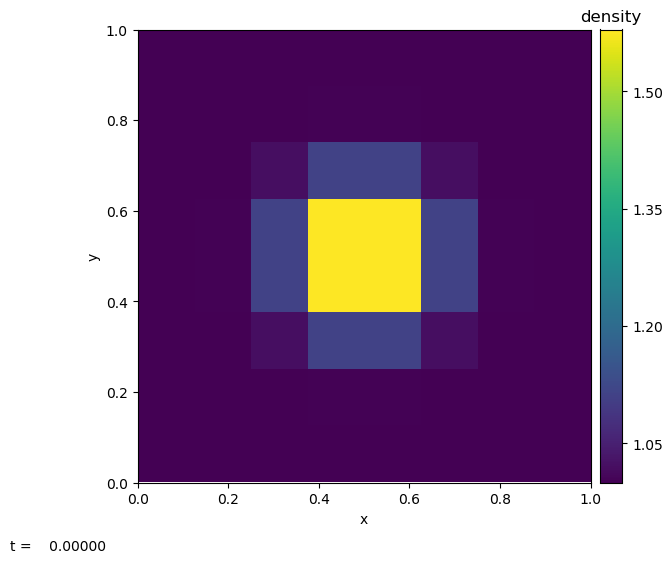

    1    0.05000    0.05000


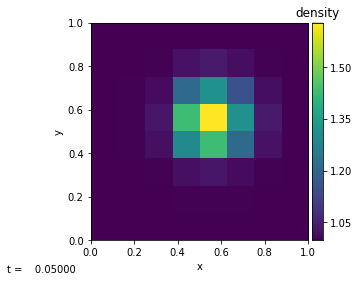

outputting...
parameter particles.n_particles never used
parameter particles.particle_generator never used
main:  1.5392191410064697
   evolve:  1.2681171894073486
   vis:  0.10479354858398438


<Figure size 432x288 with 0 Axes>

In [9]:
pyro_sim = Pyro(solver)
pyro_sim.initialize_problem(problem_name, param_file, other_commands=other_commands)
pyro_sim.run_sim()

In [10]:
dens = pyro_sim.sim.cc_data.get_var("density")
dens.pretty_print(show_ghost=False)

         1         1   0.99983   0.99859   0.99773   0.99854   0.99976         1 
   0.99997    1.0001     1.002    1.0275    1.0421    1.0212    1.0024   0.99976 
   0.99969    1.0009    1.0174    1.2163    1.3164     1.157    1.0212   0.99854 
   0.99921     1.002    1.0357    1.4336    1.6289    1.3164    1.0421   0.99773 
   0.99952    1.0008    1.0228    1.2966    1.4336    1.2163    1.0275   0.99859 
         1         1    1.0025    1.0228    1.0357    1.0174     1.002   0.99983 
         1    1.0001         1    1.0008     1.002    1.0009    1.0001         1 
         1         1         1   0.99952   0.99921   0.99969   0.99997         1 

         ^ y
         |
         +---> x
        


## advection_rk

In [11]:
solver = "advection_rk"
problem_name = "tophat"
param_file = "inputs.tophat"
other_commands = ["driver.max_steps=1", "mesh.nx=8",  "mesh.ny=8"]

pyro ...
initializing the tophat advection problem...


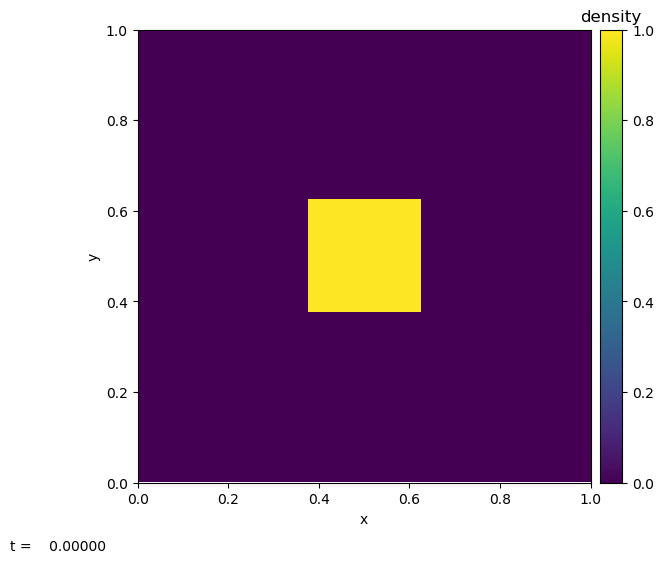

    1    0.05000    0.05000


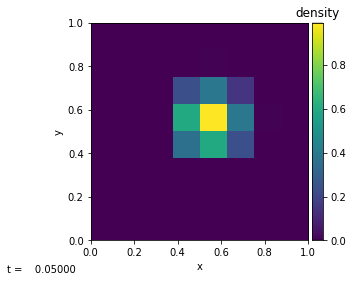

outputting...
parameter particles.n_particles never used
parameter particles.particle_generator never used
main:  0.3059535026550293
   evolve:  0.003072977066040039
   vis:  0.11471986770629883


<Figure size 432x288 with 0 Axes>

In [12]:
pyro_sim = Pyro(solver)
pyro_sim.initialize_problem(problem_name, param_file, other_commands=other_commands)
pyro_sim.run_sim()

In [13]:
dens = pyro_sim.sim.cc_data.get_var("density")
dens.pretty_print(show_ghost=False)

         0         0         0         0         0         0         0         0 
         0         0         0 0.0030222 0.0040889 0.00278520.00071111         0 
         0         0         0    0.2403   0.39295   0.15301 0.0027852         0 
         0         0         0   0.60178   0.99111   0.39295 0.0040889         0 
         0         0         0   0.36533   0.60178    0.2403 0.0030222         0 
         0         0         0         0         0         0         0         0 
         0         0         0         0         0         0         0         0 
         0         0         0         0         0         0         0         0 

         ^ y
         |
         +---> x
        


## compressible

In [14]:
solver = "compressible"
problem_name = "rt"
param_file = "inputs.rt"
other_commands = ["driver.max_steps=1", "mesh.nx=8",  "mesh.ny=24", "driver.verbose=0", "compressible.riemann=CGF"]

pyro ...
initializing the rt problem...


/home/alice/Documents/pyro2/compressible/problems/rt.py:69: RuntimeWarning: invalid value encountered in true_divide
  0.5*(xmom[:, :]**2 + ymom[:, :]**2)/dens[:, :]
/home/alice/Documents/pyro2/compressible/simulation.py:61: RuntimeWarning: invalid value encountered in true_divide
  q[:, :, ivars.iu] = U[:, :, ivars.ixmom]/U[:, :, ivars.idens]
/home/alice/Documents/pyro2/compressible/simulation.py:62: RuntimeWarning: invalid value encountered in true_divide
  q[:, :, ivars.iv] = U[:, :, ivars.iymom]/U[:, :, ivars.idens]


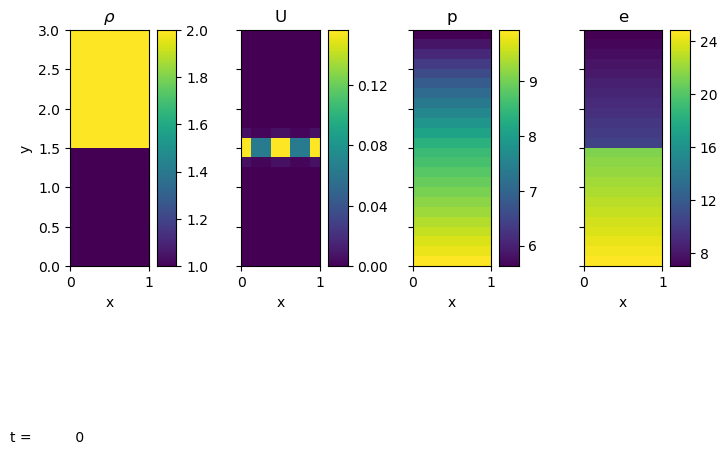

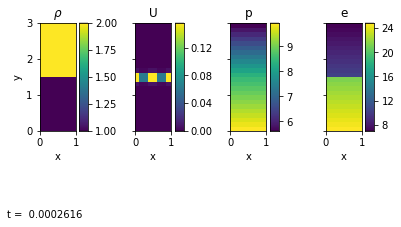

<Figure size 432x288 with 0 Axes>

In [15]:
pyro_sim = Pyro(solver)
pyro_sim.initialize_problem(problem_name, param_file, other_commands=other_commands)
pyro_sim.run_sim()

In [16]:
dens = pyro_sim.sim.cc_data.get_var("density")
dens.pretty_print(show_ghost=False)

         2         2         2         2         2         2         2         2 
         2         2         2         2         2         2         2         2 
         2         2         2         2         2         2         2         2 
         2         2         2         2         2         2         2         2 
         2         2         2         2         2         2         2         2 
         2         2         2         2         2         2         2         2 
         2         2         2         2         2         2         2         2 
         2         2         2         2         2         2         2         2 
         2         2         2         2         2         2         2         2 
         2         2         2         2         2         2         2         2 
    2.0004    2.0002    1.9999    1.9997    1.9997    1.9999    2.0002    2.0004 
         2         2    1.9999    1.9997    1.9997    1.9999         2         2 
   0.99984   0.9

## compressible_fv4

In [17]:
solver = "compressible_fv4"
problem_name = "kh"
param_file = "inputs.kh"
other_commands = ["driver.max_steps=1", "mesh.nx=8",  "mesh.ny=8", "driver.verbose=0"]

pyro ...
warning, key: driver.splitting not defined
warning, key: io.tplot not defined
initializing the Kelvin-Helmholtz problem...


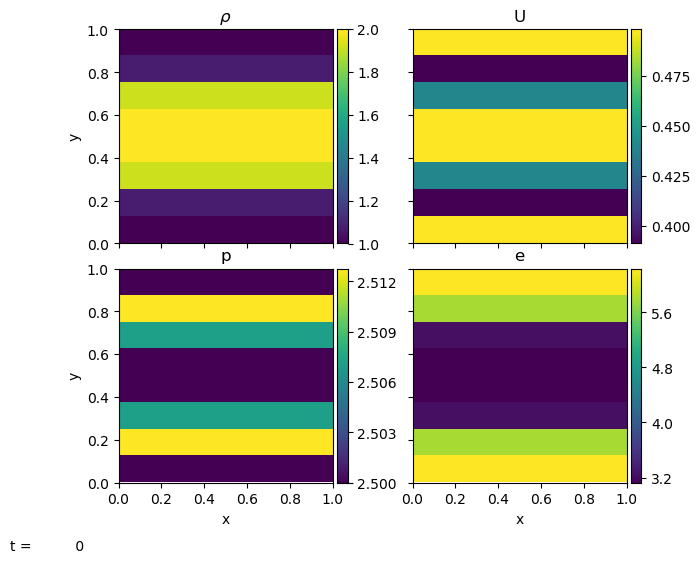

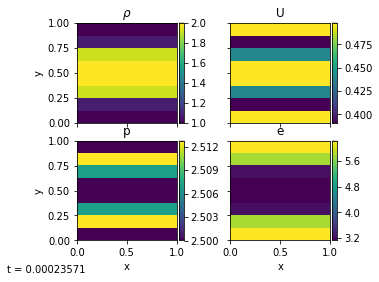

<Figure size 432x288 with 0 Axes>

In [18]:
pyro_sim = Pyro(solver)
pyro_sim.initialize_problem(problem_name, param_file, other_commands=other_commands)
pyro_sim.run_sim()

In [19]:
e = pyro_sim.sim.cc_data.get_var("eint")
e.pretty_print(show_ghost=False)

    6.2377    6.2377    6.2377    6.2377    6.2377    6.2377    6.2377    6.2377 
    5.8296    5.8296    5.8296    5.8296    5.8296    5.8296    5.8296    5.8296 
    3.2605    3.2605    3.2605    3.2605    3.2605    3.2605    3.2605    3.2605 
    3.1281    3.1281    3.1281    3.1281    3.1281    3.1281    3.1281    3.1281 
    3.1281    3.1281    3.1281    3.1281    3.1281    3.1281    3.1281    3.1281 
    3.2605    3.2605    3.2605    3.2605    3.2605    3.2605    3.2605    3.2605 
    5.8296    5.8296    5.8296    5.8296    5.8296    5.8296    5.8296    5.8296 
    6.2377    6.2377    6.2377    6.2377    6.2377    6.2377    6.2377    6.2377 

         ^ y
         |
         +---> x
        


## compressible_rk

In [20]:
solver = "compressible_rk"
problem_name = "quad"
param_file = "inputs.quad"
other_commands = ["driver.max_steps=1", "mesh.nx=16",  "mesh.ny=16", "driver.verbose=0"]

pyro ...
initializing the quadrant problem...


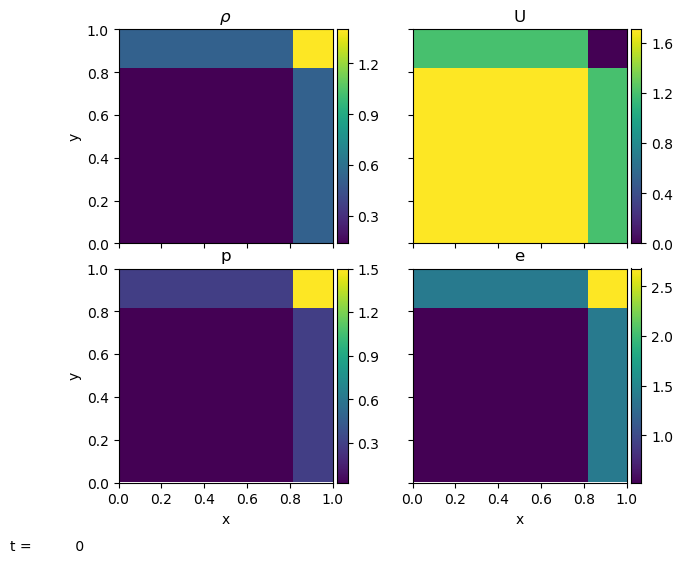

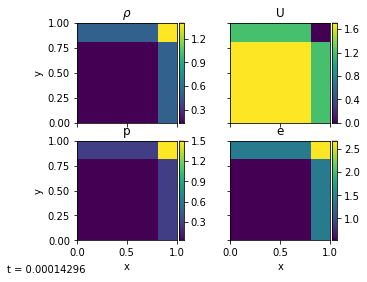

<Figure size 432x288 with 0 Axes>

In [21]:
pyro_sim = Pyro(solver)
pyro_sim.initialize_problem(problem_name, param_file, other_commands=other_commands)
pyro_sim.run_sim()

In [22]:
p = pyro_sim.sim.cc_data.get_var("pressure")
p.pretty_print(show_ghost=False)

       0.3       0.3       0.3       0.3       0.3       0.3       0.3       0.3       0.3       0.3       0.3       0.3   0.30292    1.4997       1.5       1.5 
       0.3       0.3       0.3       0.3       0.3       0.3       0.3       0.3       0.3       0.3       0.3       0.3   0.30292    1.4997       1.5       1.5 
   0.29994   0.29994   0.29994   0.29994   0.29994   0.29994   0.29994   0.29994   0.29994   0.29994   0.29994   0.29994   0.30304    1.4991    1.4997    1.4997 
  0.029558  0.029558  0.029558  0.029558  0.029558  0.029558  0.029558  0.029558  0.029558  0.029558  0.029558  0.029559  0.030208   0.30304   0.30292   0.30292 
  0.029032  0.029032  0.029032  0.029032  0.029032  0.029032  0.029032  0.029032  0.029032  0.029032  0.029032  0.029032  0.029559   0.29994       0.3       0.3 
  0.029032  0.029032  0.029032  0.029032  0.029032  0.029032  0.029032  0.029032  0.029032  0.029032  0.029032  0.029032  0.029558   0.29994       0.3       0.3 
  0.029032  0.029032  0.0290

## compressible_sdc

In [23]:
solver = "compressible_sdc"
problem_name = "sod"
param_file = "inputs.sod.y"
other_commands = ["driver.max_steps=1", "mesh.nx=4",  "mesh.ny=16", "driver.verbose=0"]

pyro ...
initializing the sod problem...


/home/alice/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_base.py:3471: UserWarning: Attempting to set identical bottom==top results
in singular transformations; automatically expanding.
bottom=0.0, top=0.0
  'bottom=%s, top=%s') % (bottom, top))


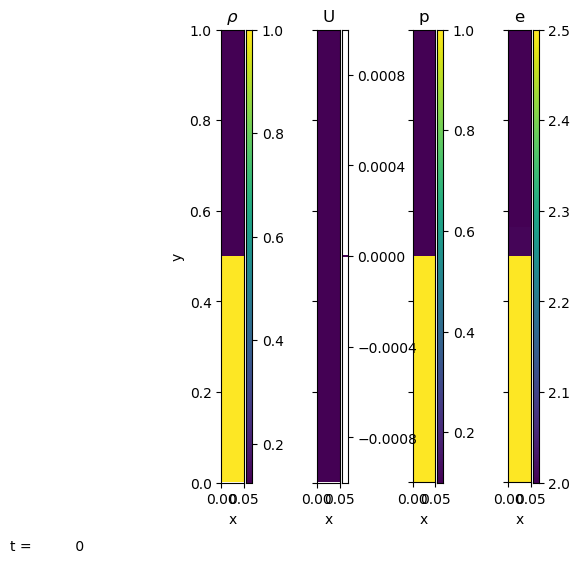

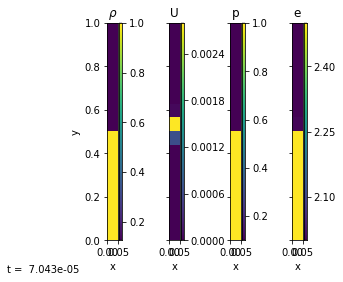


          The script analysis/sod_compare.py can be used to compare
          this output to the exact solution.  Some sample exact solution
          data is present as analysis/sod-exact.out
          


<Figure size 432x288 with 0 Axes>

In [24]:
pyro_sim = Pyro(solver)
pyro_sim.initialize_problem(problem_name, param_file, other_commands=other_commands)
pyro_sim.run_sim()

In [25]:
p = pyro_sim.sim.cc_data.get_var("pressure")
p.pretty_print(show_ghost=False)

       0.1       0.1       0.1       0.1 
       0.1       0.1       0.1       0.1 
       0.1       0.1       0.1       0.1 
       0.1       0.1       0.1       0.1 
       0.1       0.1       0.1       0.1 
       0.1       0.1       0.1       0.1 
  0.099996  0.099996  0.099996  0.099996 
   0.10175   0.10175   0.10175   0.10175 
   0.99825   0.99825   0.99825   0.99825 
         1         1         1         1 
         1         1         1         1 
         1         1         1         1 
         1         1         1         1 
         1         1         1         1 
         1         1         1         1 
         1         1         1         1 

         ^ y
         |
         +---> x
        


## diffusion

In [26]:
solver = "diffusion"
problem_name = "gaussian"
param_file = "inputs.gaussian"
other_commands = ["driver.max_steps=1", "mesh.nx=16",  "mesh.ny=16", "driver.verbose=0"]

pyro ...
initializing the Gaussian diffusion problem...


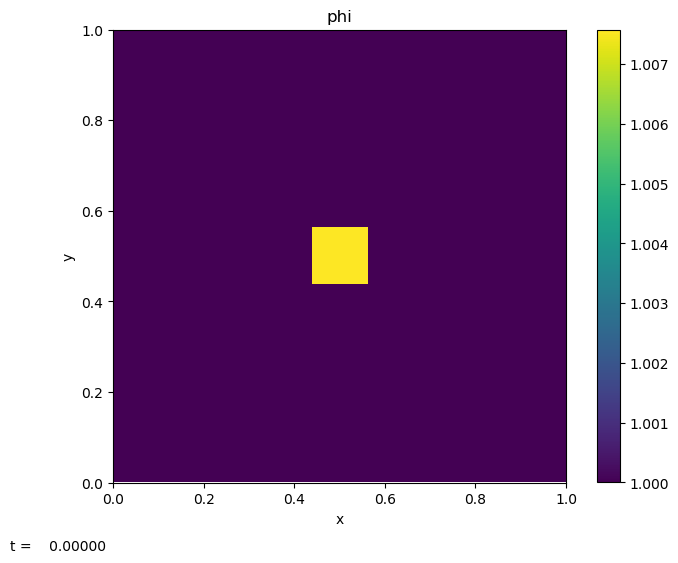

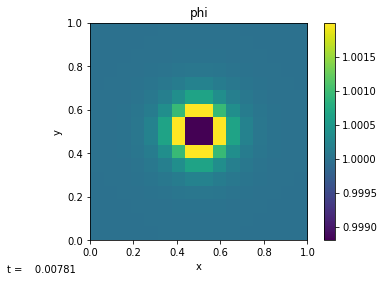


          The solution can be compared to the analytic solution with
          the script analysis/gauss_diffusion_compare.py
          


<Figure size 432x288 with 0 Axes>

In [27]:
pyro_sim = Pyro(solver)
pyro_sim.initialize_problem(problem_name, param_file, other_commands=other_commands)
pyro_sim.run_sim()

In [28]:
dens = pyro_sim.sim.cc_data.get_var("phi")
dens.pretty_print(show_ghost=False)

         1         1         1         1         1         1         1         1         1         1         1         1         1         1         1         1 
         1         1         1         1         1         1         1         1         1         1         1         1         1         1         1         1 
         1         1         1         1         1         1         1         1         1         1         1         1         1         1         1         1 
         1         1         1         1         1         1    1.0001    1.0001    1.0001    1.0001         1         1         1         1         1         1 
         1         1         1         1         1    1.0001    1.0001    1.0002    1.0002    1.0001    1.0001         1         1         1         1         1 
         1         1         1         1    1.0001    1.0002    1.0004    1.0007    1.0007    1.0004    1.0002    1.0001         1         1         1         1 
         1         1        

## incompressible

In [29]:
solver = "incompressible"
problem_name = "shear"
param_file = "inputs.shear"
other_commands = ["driver.max_steps=1", "mesh.nx=8",  "mesh.ny=8", "driver.verbose=0"]

pyro ...
initializing the incompressible shear problem...
y_half =  0.5
delta_s =  0.05
rho_s =  42.0
extrema:  -1.0 0.9999997110039925


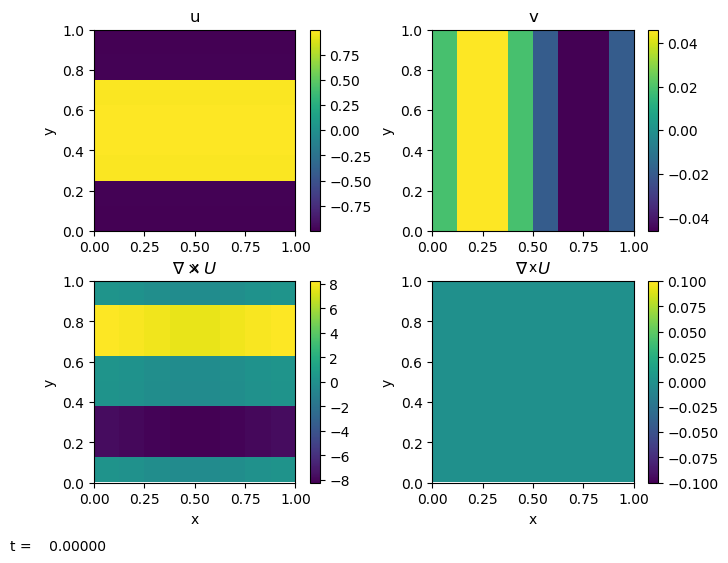

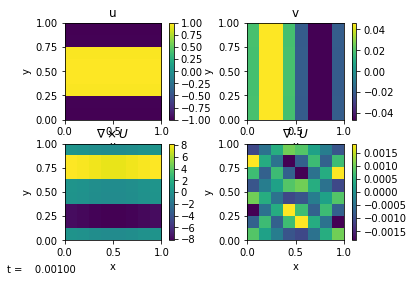

<Figure size 432x288 with 0 Axes>

In [30]:
pyro_sim = Pyro(solver)
pyro_sim.initialize_problem(problem_name, param_file, other_commands=other_commands)
pyro_sim.run_sim()

In [31]:
u = pyro_sim.sim.cc_data.get_var("x-velocity")
u.pretty_print(show_ghost=False)

        -1   -1.0001   -1.0001        -1  -0.99995  -0.99992  -0.99992  -0.99995 
  -0.98937  -0.98915  -0.98915  -0.98937   -0.9894  -0.98929  -0.98929   -0.9894 
    0.9894   0.98929   0.98929    0.9894   0.98937   0.98915   0.98915   0.98937 
   0.99995   0.99992   0.99992   0.99995         1    1.0001    1.0001         1 
         1    1.0001    1.0001         1   0.99995   0.99992   0.99992   0.99995 
   0.98937   0.98915   0.98915   0.98937    0.9894   0.98929   0.98929    0.9894 
   -0.9894  -0.98929  -0.98929   -0.9894  -0.98937  -0.98915  -0.98915  -0.98937 
  -0.99995  -0.99992  -0.99992  -0.99995        -1   -1.0001   -1.0001        -1 

         ^ y
         |
         +---> x
        


## lm_atm

In [32]:
solver = "lm_atm"
problem_name = "bubble"
param_file = "inputs.bubble"
other_commands = ["driver.max_steps=1", "mesh.nx=16",  "mesh.ny=16", "driver.verbose=0"]

pyro ...
initializing the bubble problem...


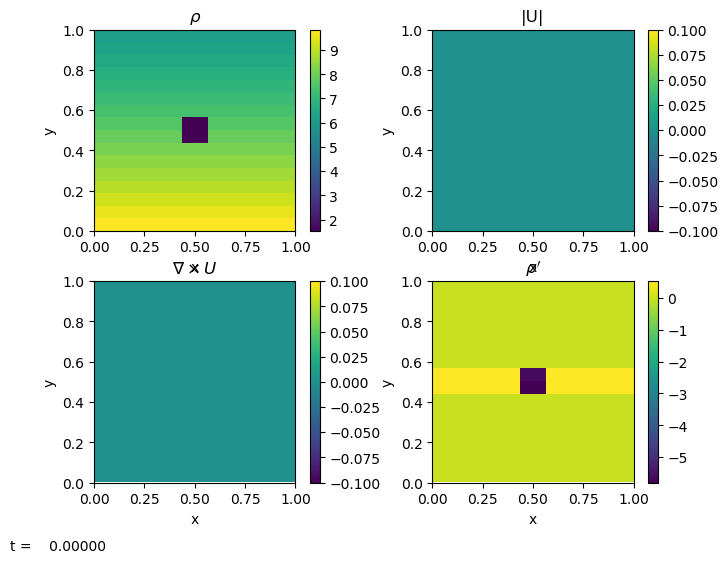

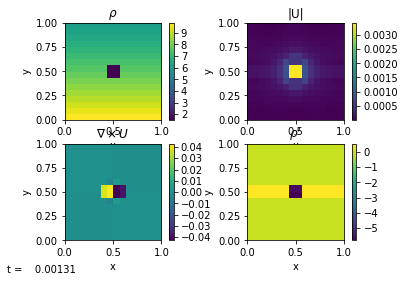

<Figure size 432x288 with 0 Axes>

In [33]:
pyro_sim = Pyro(solver)
pyro_sim.initialize_problem(problem_name, param_file, other_commands=other_commands)
pyro_sim.run_sim()

In [34]:
v = pyro_sim.sim.cc_data.get_var("y-velocity")
v.pretty_print(show_ghost=False, fmt="%10.3g")

 -4.31e-05 -3.83e-05 -2.87e-05 -1.44e-05  3.88e-06  2.41e-05  4.25e-05  5.39e-05  5.39e-05  4.25e-05  2.41e-05  3.88e-06 -1.44e-05 -2.87e-05 -3.83e-05 -4.31e-05 
  -4.7e-05 -4.23e-05 -3.28e-05  -1.8e-05  1.86e-06  2.54e-05  4.86e-05  6.42e-05  6.42e-05  4.86e-05  2.54e-05  1.86e-06  -1.8e-05 -3.28e-05 -4.23e-05  -4.7e-05 
 -5.51e-05 -5.09e-05 -4.18e-05 -2.65e-05 -3.73e-06  2.69e-05  6.19e-05  8.92e-05  8.92e-05  6.19e-05  2.69e-05 -3.73e-06 -2.65e-05 -4.18e-05 -5.09e-05 -5.51e-05 
 -6.73e-05  -6.4e-05 -5.65e-05 -4.22e-05 -1.69e-05  2.42e-05  8.24e-05   0.00014   0.00014  8.24e-05  2.42e-05 -1.69e-05 -4.22e-05 -5.65e-05  -6.4e-05 -6.73e-05 
 -8.22e-05 -8.11e-05 -7.75e-05 -6.81e-05 -4.53e-05  4.76e-06  0.000103  0.000247  0.000247  0.000103  4.76e-06 -4.53e-05 -6.81e-05 -7.75e-05 -8.11e-05 -8.22e-05 
 -9.77e-05 -9.99e-05 -0.000104 -0.000106 -9.99e-05 -6.11e-05  7.66e-05  0.000492  0.000492  7.66e-05 -6.11e-05 -9.99e-05 -0.000106 -0.000104 -9.99e-05 -9.77e-05 
 -6.65e-05 -7.26e-05 -8.57e-

## compressible_sr

In [32]:
solver = "compressible_sr"
problem_name = "kh"
param_file = "inputs.kh"
other_commands = ["driver.max_steps=1", "mesh.nx=8",  "mesh.ny=8", "driver.verbose=0"]

pyro ...
warning, key: driver.splitting not defined
warning, key: io.tplot not defined
initializing the Kelvin-Helmholtz problem...


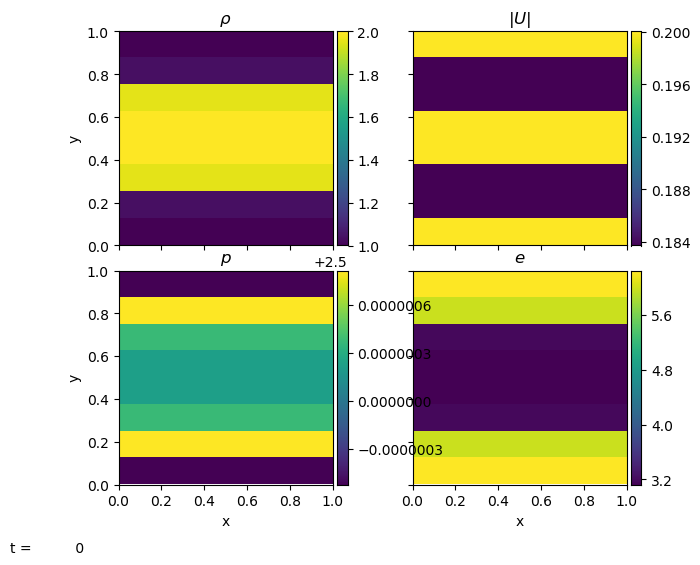

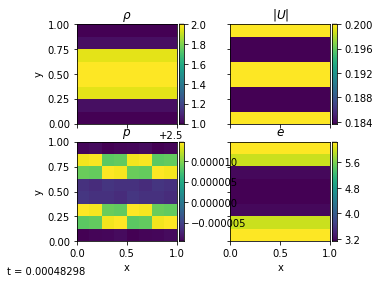

In [33]:
sim = pyro.doit(solver, problem_name, param_file, other_commands=other_commands)

In [34]:
dens = sim.cc_data.get_var("density")
dens.pretty_print(show_ghost=False)

    1.0209    1.0209    1.0209    1.0209    1.0209    1.0209    1.0209    1.0209 
    1.0591    1.0591    1.0591    1.0591    1.0591    1.0591    1.0591    1.0591 
    1.9929    1.9929    1.9929    1.9929    1.9929    1.9929    1.9929    1.9929 
     2.041     2.041     2.041     2.041     2.041     2.041     2.041     2.041 
     2.041     2.041     2.041     2.041     2.041     2.041     2.041     2.041 
    1.9929    1.9929    1.9929    1.9929    1.9929    1.9929    1.9929    1.9929 
    1.0591    1.0591    1.0591    1.0591    1.0591    1.0591    1.0591    1.0591 
    1.0209    1.0209    1.0209    1.0209    1.0209    1.0209    1.0209    1.0209 

         ^ y
         |
         +---> x
        


In [35]:
solver = "compressible_sr"
problem_name = "advect"
param_file = "inputs.advect.64"
other_commands = ["driver.max_steps=1", "mesh.nx=8",  "mesh.ny=8", "driver.verbose=0"]

pyro ...
initializing the advect problem...


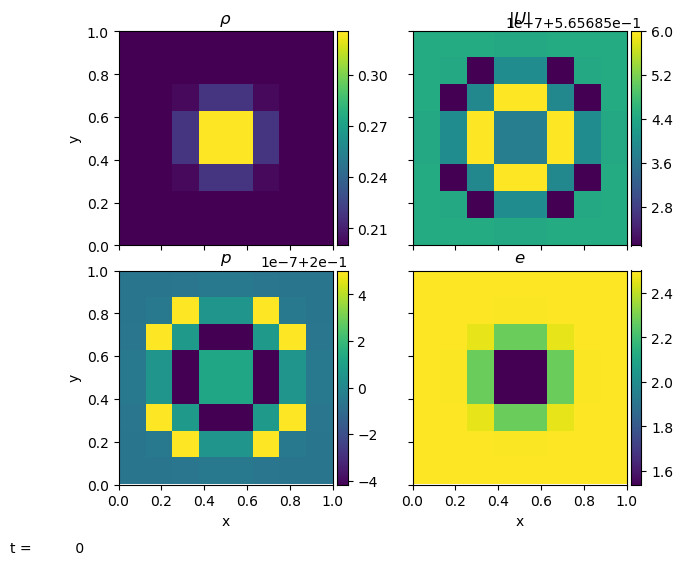

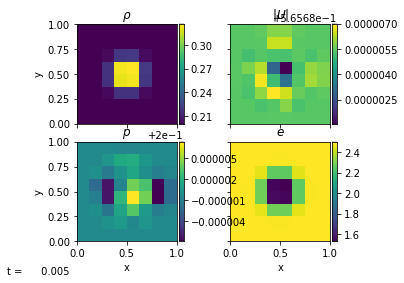

In [36]:
sim = pyro.doit(solver, problem_name, param_file, other_commands=other_commands)

In [37]:
p = sim.cc_data.get_var("pressure")
p.pretty_print(show_ghost=False)

       0.2       0.2       0.2       0.2       0.2       0.2       0.2       0.2 
       0.2       0.2       0.2       0.2       0.2       0.2       0.2       0.2 
       0.2       0.2       0.2       0.2       0.2       0.2       0.2       0.2 
       0.2       0.2   0.19999       0.2       0.2       0.2   0.19999       0.2 
       0.2       0.2   0.19999       0.2   0.20001       0.2   0.19999       0.2 
       0.2       0.2       0.2       0.2       0.2       0.2       0.2       0.2 
       0.2       0.2       0.2       0.2       0.2       0.2       0.2       0.2 
       0.2       0.2       0.2       0.2       0.2       0.2       0.2       0.2 

         ^ y
         |
         +---> x
        


In [38]:
solver = "compressible_sr"
problem_name = "acoustic_pulse"
param_file = "inputs.acoustic_pulse"
other_commands = ["driver.max_steps=1", "mesh.nx=8",  "mesh.ny=8", "driver.verbose=0"]

pyro ...
initializing the acoustic pulse problem...


/home/alice/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_base.py:3285: UserWarning: Attempting to set identical bottom==top results
in singular transformations; automatically expanding.
bottom=0.0, top=0.0
  'bottom=%s, top=%s') % (bottom, top))


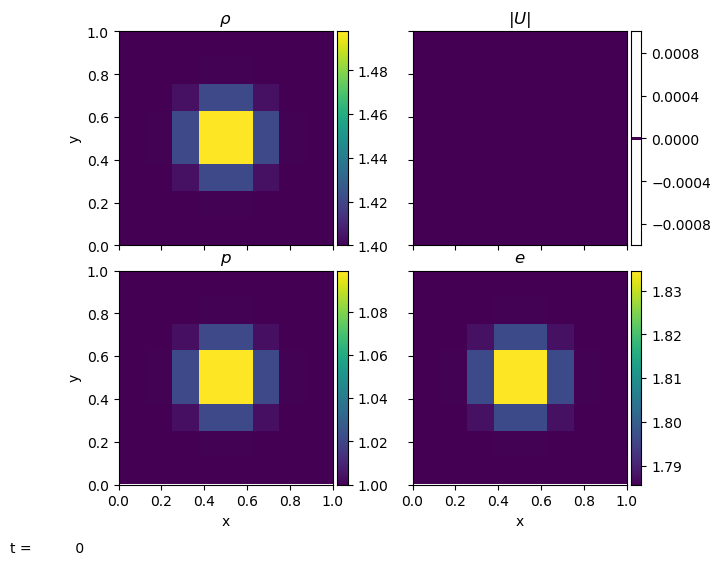

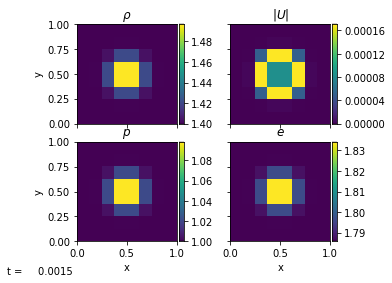

In [39]:
sim = pyro.doit(solver, problem_name, param_file, other_commands=other_commands)

In [40]:
dens = sim.cc_data.get_var("eint")
dens.pretty_print(show_ghost=False)

    1.7857    1.7857    1.7857    1.7857    1.7857    1.7857    1.7857    1.7857 
    1.7857    1.7857    1.7858    1.7861    1.7861    1.7858    1.7857    1.7857 
    1.7857    1.7858    1.7879    1.7969    1.7969    1.7879    1.7858    1.7857 
    1.7857    1.7861    1.7969    1.8343    1.8343    1.7969    1.7861    1.7857 
    1.7857    1.7861    1.7969    1.8343    1.8343    1.7969    1.7861    1.7857 
    1.7857    1.7858    1.7879    1.7969    1.7969    1.7879    1.7858    1.7857 
    1.7857    1.7857    1.7858    1.7861    1.7861    1.7858    1.7857    1.7857 
    1.7857    1.7857    1.7857    1.7857    1.7857    1.7857    1.7857    1.7857 

         ^ y
         |
         +---> x
        


In [41]:
solver = "compressible_sr"
problem_name = "quad"
param_file = "inputs.quad"
other_commands = ["driver.max_steps=1", "mesh.nx=8",  "mesh.ny=8", "driver.verbose=0"]

pyro ...
initializing the quadrant problem...


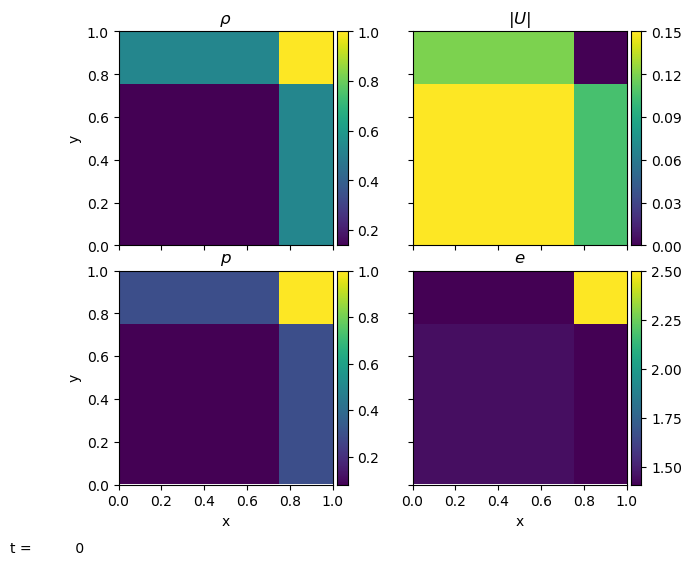

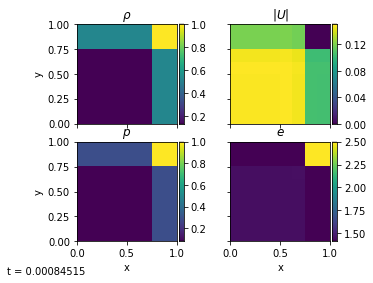

In [42]:
sim = pyro.doit(solver, problem_name, param_file, other_commands=other_commands)

In [43]:
v = sim.cc_data.get_var("velocity")
v[0].pretty_print(show_ghost=False)

    0.1206    0.1206    0.1206    0.1206   0.12103   0.11866-0.000527130.00013683 
   0.12061   0.12061   0.12061   0.12061   0.12103   0.11866-0.000525690.00013686 
   0.10601   0.10601   0.10601   0.10601   0.10654   0.10359-0.000487470.00013304 
   0.10606   0.10606   0.10606   0.10606   0.10659   0.10366-0.00048881 0.0001332 
   0.10605   0.10605   0.10605   0.10605   0.10658   0.10364-0.000488740.00013316 
   0.10605   0.10605   0.10605   0.10605   0.10658   0.10364-0.000488740.00013316 
   0.10605   0.10605   0.10605   0.10605   0.10658   0.10364-0.000488740.00013316 
   0.10605   0.10605   0.10605   0.10605   0.10658   0.10364-0.000488740.00013316 

         ^ y
         |
         +---> x
        


In [44]:
solver = "compressible_sr"
problem_name = "rt"
param_file = "inputs.rt"
other_commands = ["driver.max_steps=1", "mesh.nx=8",  "mesh.ny=24", "driver.verbose=0"]

pyro ...
initializing the rt problem...


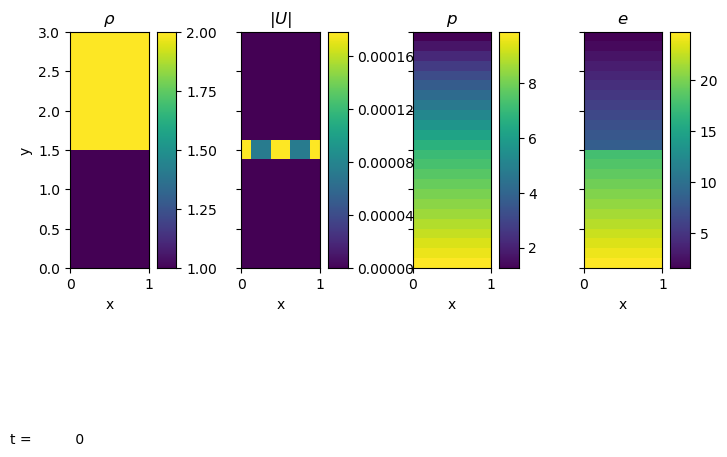

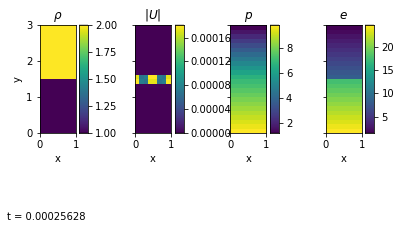

In [45]:
sim = pyro.doit(solver, problem_name, param_file, other_commands=other_commands)

In [46]:
v = sim.cc_data.get_var("velocity")
v[1].pretty_print(show_ghost=False)

-2.6073e-08-2.6073e-087.0581e-097.0581e-097.0581e-097.0581e-09-2.6073e-08-2.6073e-08 
-1.6628e-08-1.6628e-084.7895e-094.7895e-094.7895e-094.7895e-09-1.6628e-08-1.6628e-08 
-1.1829e-08-1.1829e-083.5225e-093.5225e-093.5225e-093.5225e-09-1.1829e-08-1.1829e-08 
-8.9813e-09-8.9813e-092.7307e-092.7307e-092.7307e-092.7307e-09-8.9813e-09-8.9813e-09 
-7.1232e-09-7.1232e-09 2.197e-09 2.197e-09 2.197e-09 2.197e-09-7.1232e-09-7.1232e-09 
-5.8303e-09-5.8303e-091.8171e-091.8171e-091.8171e-091.8171e-09-5.8303e-09-5.8303e-09 
-4.8874e-09-4.8874e-091.5354e-091.5354e-091.5354e-091.5354e-09-4.8874e-09-4.8874e-09 
-4.1745e-09-4.1745e-091.3197e-091.3197e-091.3197e-091.3197e-09-4.1745e-09-4.1745e-09 
-3.6195e-09-3.6198e-091.3113e-091.3121e-091.3121e-091.3113e-09-3.6198e-09-3.6195e-09 
-1.2387e-07-1.2387e-07-1.193e-07-1.1931e-07-1.1931e-07-1.193e-07-1.2387e-07-1.2387e-07 
2.1898e-062.0195e-061.7768e-061.6067e-061.6067e-061.7768e-062.0195e-062.1898e-06 
0.000174547.0109e-05-7.7432e-05-0.00018164-0.00018164-7.

In [47]:
solver = "compressible_sr"
problem_name = "bubble"
param_file = "inputs.bubble"
other_commands = ["driver.max_steps=1", "mesh.nx=16",  "mesh.ny=32", "driver.verbose=0"]

pyro ...
initializing the bubble problem...


/home/alice/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_base.py:3285: UserWarning: Attempting to set identical bottom==top results
in singular transformations; automatically expanding.
bottom=0.0, top=0.0
  'bottom=%s, top=%s') % (bottom, top))


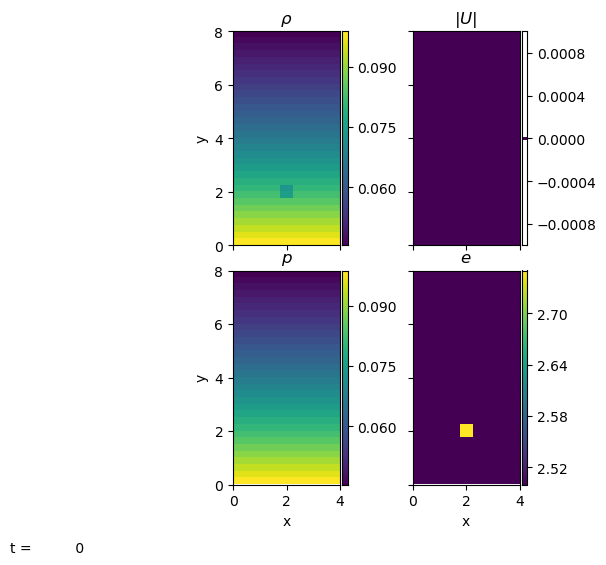

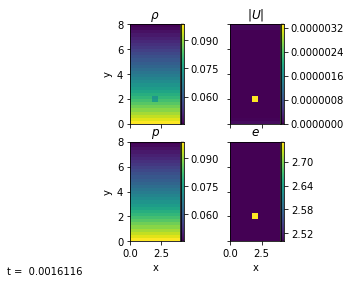

In [48]:
sim = pyro.doit(solver, problem_name, param_file, other_commands=other_commands)

In [49]:
c = sim.cc_data.get_var("soundspeed")
c.pretty_print(show_ghost=False)

    1.1832    1.1832    1.1832    1.1832    1.1832    1.1832    1.1832    1.1832    1.1832    1.1832    1.1832    1.1832    1.1832    1.1832    1.1832    1.1832 
    1.1832    1.1832    1.1832    1.1832    1.1832    1.1832    1.1832    1.1832    1.1832    1.1832    1.1832    1.1832    1.1832    1.1832    1.1832    1.1832 
    1.1832    1.1832    1.1832    1.1832    1.1832    1.1832    1.1832    1.1832    1.1832    1.1832    1.1832    1.1832    1.1832    1.1832    1.1832    1.1832 
    1.1832    1.1832    1.1832    1.1832    1.1832    1.1832    1.1832    1.1832    1.1832    1.1832    1.1832    1.1832    1.1832    1.1832    1.1832    1.1832 
    1.1832    1.1832    1.1832    1.1832    1.1832    1.1832    1.1832    1.1832    1.1832    1.1832    1.1832    1.1832    1.1832    1.1832    1.1832    1.1832 
    1.1832    1.1832    1.1832    1.1832    1.1832    1.1832    1.1832    1.1832    1.1832    1.1832    1.1832    1.1832    1.1832    1.1832    1.1832    1.1832 
    1.1832    1.1832    1.18